# Stability of the implicit midpoint method
$$ x_{i+1} = x_i + h f\left( t_i + \frac{h}{2}, \, \frac{x_i + x_{i+1}}{2} \right) $$

In [2]:
using Pkg
Pkg.activate(".")
using SymPy
using Plots

In [23]:
λ, h, x0, x1 = symbols("lambda, h, x_0, x_1")
θ,zx, zy = symbols("theta,z_x, z_y", real=true)
;

In [24]:
f(x) = λ*x
eq1 = Eq(x1, x0 + h*f( (x0+x1)//2  ) )

               /x_0   x_1\      
x_1 = h*lambda*|--- + ---| + x_0
               \ 2     2 /      

In [25]:
sol1 = solve( eq1, x1 )[1]

-x_0*(h*lambda + 2) 
--------------------
    h*lambda - 2    

In [26]:
eq2 = diff(sol1,x0) - (cos(θ)+1im*sin(θ))  |> subs( h=>(zx + 1im*zy)/λ )

                             z_x + I*z_y + 2
-I*sin(theta) - cos(theta) - ---------------
                             z_x + I*z_y - 2

In [29]:
eq3 = [ real(eq2), imag(eq2) ]

2-element Array{Sym,1}:
   -z_y^2/(z_y^2 + (z_x - 2)^2) - (z_x - 2)*(z_x + 2)/(z_y^2 + (z_x - 2)^2) - cos(theta)
 -z_y*(z_x - 2)/(z_y^2 + (z_x - 2)^2) + z_y*(z_x + 2)/(z_y^2 + (z_x - 2)^2) - sin(theta)

In [32]:
solve( eq3, [zx, zy] )

1-element Array{Tuple{Sym,Sym},1}:
 (0, 2*sin(theta)/(cos(theta) + 1))

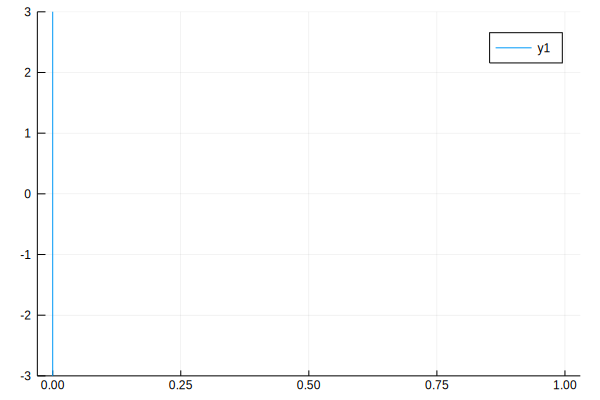

In [34]:
plot( θ->0, θ-> 2*sin(θ)/(cos(θ)+1), 0, 2π, ylim=(-3,3) )

## Another method
Now let's try this numerically

In [37]:
eq4 = diff(sol1,x0) |> subs( h=>(zx + 1im*zy)/λ )

-(z_x + I*z_y + 2) 
-------------------
  z_x + I*z_y - 2  

In [46]:
Fn = lambdify( abs(eq4), (zx,zy) )

#79 (generic function with 1 method)

In [51]:

;

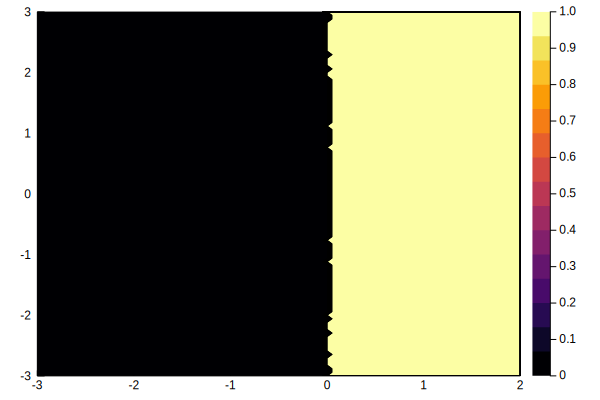

In [68]:
zxn = LinRange(-3,2,101)
zyn = LinRange(-3,3,103)
contour( zxn, zyn , 
    [ Fn(x,y)>=1 ? 1 : 0 for y in zyn, x in zxn ] , 
    fill=true )